# DSR - Practical 1 - Perceptron

## Perceptron and the delta rule

#### Perceptron training:
1. Initialize the weights vector with small random numbers
2. Repeat until convergence:
    Loop over feature vector ($𝑥_j$) and labels ($l_i$) in training set $D$.
    Take $𝑥$ and pass it through the perceptron, calculating the output values: 
    $$ y_{j}=w(t)\cdot x_{j}=ƒ(w(t)){x_{j}}$$
    Update weights: 
    $$ w_{i}(t+1)=w_{i}(t)+𝛼(l_{j}-y_{j})x_{j}$$  
    for all $0 <= i < n$
3. Terminate criterion

In [134]:
import numpy as np
import matplotlib.pyplot as plt

### Update the perceptron class where it says: # ENTER YOUR CODE HERE

In [135]:
class Perceptron:
    # N is the length of our input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N ) / np.sqrt(N) # normalizing the weights 
        self.N = N
        self.alpha = alpha
        
        
    def step(self, x):
        # apply a step activation function
        # ENTER YOUR CODE HERE
        # simple step function: 
        # return int(x > 0)
        # from Copilot: Sigmoid function
        return int(1. / (1 + np.exp(-x)) > 0.5)
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
        # loop over the desired number of epochs
        w = self.W
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
                for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                    
                    # ENTER YOUR CODE HERE FOR 
                    # dot product 
                    net = np.dot(x, self.W)
                    p = self.step(net)
                    # perform weight update if prediction
                    # does not match target
                    if p != target:
                        # calculatew = np.array([]) delta
                        delta =  p - target
                        if epochs <= 10:
                            #print("index:", x.index()) 
                            print("delta: ", delta)
                            print("w(t) ", self.W)
                        # update the weight matrix
                        # ENTER YOUR CODE HERE
                        self.W = self.W - self.alpha * delta * x
                        w = np.append(w, self.W)
                        #if epochs<=10:
                        #print("w: ", w)
        #pass
        return w

    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        return self.step(np.dot(X, self.W))
    

## Logical OR dataset

In [142]:
# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
#p.fit(X, y, epochs=20,addBias=False)
p.fit(X, y, epochs=20,addBias=False)

training perceptron...


array([0.98753654, 0.36143761])

In [143]:
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=False)
    #pred = p.predict(x)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))

testing perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=1
data=[1 1], true_label=1, pred=1


/tmp/ipykernel_101354/1562847032.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(1. / (1 + np.exp(-x)) > 0.5)


## logical AND dataset

In [147]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# create a perceptron instance and fit it to the above dataset
### ENTER YOUR CODE HERE

# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20,addBias=False)


# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=False)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))


training perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=1
data=[1 0], true_label=0, pred=1
data=[1 1], true_label=1, pred=1


/tmp/ipykernel_101354/1562847032.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(1. / (1 + np.exp(-x)) > 0.5)


## Did it work?
### try changing the addBias to True and see if this helps.
#### what is this bias parameter???

In [145]:
# ENTER YOUR CODE HERE
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# create a perceptron instance and fit it to the above dataset
### ENTER YOUR CODE HERE

# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
#p.fit(X, y, epochs=20,addBias=False)
p.fit(X, y, epochs=20,addBias=True)

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))


training perceptron...
True
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=0
data=[1 1], true_label=1, pred=1


/tmp/ipykernel_101354/1562847032.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(1. / (1 + np.exp(-x)) > 0.5)


## Change the perceptron class such that you return the weights after each iteration

True
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=0
data=[1 1], true_label=1, pred=1


/tmp/ipykernel_101354/1562847032.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(1. / (1 + np.exp(-x)) > 0.5)


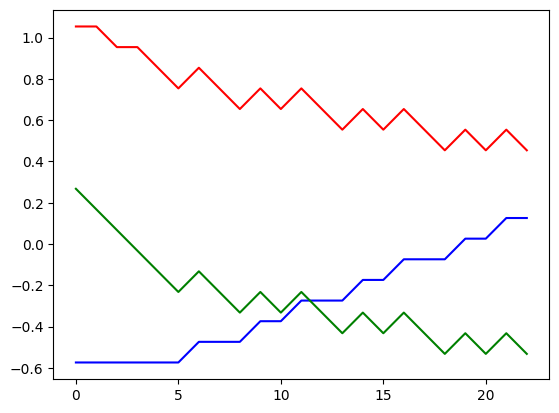

In [150]:
## change the Perceptron class such that you save the weights 
## during training and return them then plot them
# ENTER YOUR CODE HERE
p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=50,addBias=True)


for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
plt.plot(w[0:len(w):3], color='red')
plt.plot(w[1:len(w):3], color='blue')
plt.plot(w[2:len(w):3], color='green')
#plt.plot(w2)
# plt.plot(w3)

#print(w)

### Change learning rate to 0.01 and repeat 

True
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=1
data=[1 1], true_label=1, pred=1


/tmp/ipykernel_101354/1562847032.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(1. / (1 + np.exp(-x)) > 0.5)


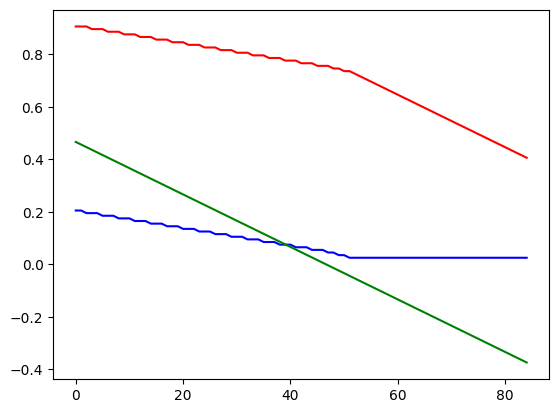

In [151]:
# ENTER YOUR CODE HERE
p = Perceptron(X.shape[1], alpha=0.01)
w = p.fit(X, y, epochs=50,addBias=True)


for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
plt.plot(w[0:len(w):3], color='red')
plt.plot(w[1:len(w):3], color='blue')
plt.plot(w[2:len(w):3], color='green')

### What does reducing the learning rate do?

### Train the perceptron on the XOR data set


True
data=[0 0], true_label=0, pred=1
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=0
data=[1 1], true_label=0, pred=0


/tmp/ipykernel_101354/1562847032.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(1. / (1 + np.exp(-x)) > 0.5)


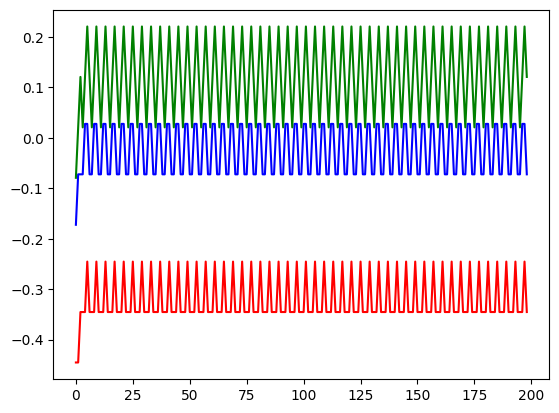

In [154]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
# ENTER YOUR CODE HERE

p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=50,addBias=True)


for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
plt.plot(w[0:len(w):3], color='red')
plt.plot(w[1:len(w):3], color='blue')
plt.plot(w[2:len(w):3], color='green')

### Were you able to solve the XOR problem? 
### How is this problem different than the AND and OR problems?


### Perceptron for a regression problem

In [ ]:
X = np.arange (0,100,1)
noise = np.random.normal(loc=0.0, scale=5, size=100)
y = 70 + 1.2*X + noise

# normalization of inputs and lables 
y=y/np.max(X)
X=X/np.max(X)

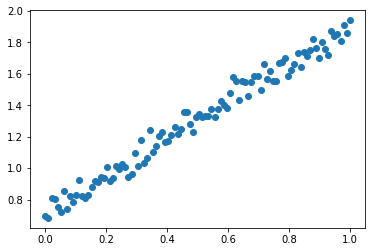

In [ ]:
plt.scatter(X, y)

#### How should you change the activation function to fit a regression problem?

In [ ]:
# implement the perceptron class here for regression
# ENTER YOUR CODE HERE


In [ ]:
# define our perceptron and train it with and without bi
# ENTER YOUR CODE HERE


True
training perceptron...


(10,)


ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

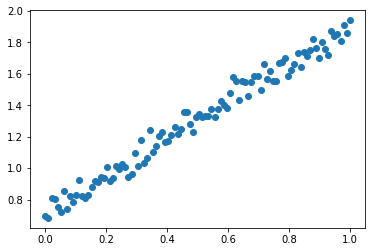

In [ ]:
# PLOTTING DATA AS ABOVE AND ADD A PLOT OF THE PREDICTION

plt.scatter(X,y)
x = np.arange(0,1,0.1)
print(x.shape)
predictions=[]
for xx in x:
    pred=p.predict(xx,addBias=False)
    predictions.append(pred)
plt.plot(x,predictions,c="red")    

### What is the difference with/without Bias? 

### Repeat the training without the normalization of the data, what happened?

In [ ]:
# ENTER YOUR CODE HERE

### Were you able to train the model? Why not? Plot the weights and see how they look when the data is normalized and when the data is not normalized.

In [ ]:
# PLOT THE WEIGHTS AS A FUNCTION OF TRAINING
# ENTER YOUR CODE HERE

### Using the normalized data retrain the perceptron. Use the following initial weights:
`self.W = np.random.randn(N) * 1000`

#### What do you think will happen, why?
